# EDA of International GHG Emissions

## Overview

## Business Understanding

In 2022, The Conference of Parties or COP27 included compensation for economic losses due to climate catastrophes (i.e. climate reparations) on the summit agenda. The idea is that wealthy countries who did not have to limit their emissions during industrialization and are the larger Greenhouse Gas emitters would agree to create a new global fund to pay for climate damage (Floods, Droughts, Heat Waves, etc.)afflicting developing countries.  

According to [United Nations Environment Programme (UNEP)](https://www.unep.org/news-and-stories/story/what-you-need-know-about-cop27-loss-and-damage-fund), The 2022 Adaptation Gap Report indicates that such a "Loss and Damage Fund" would need over USD 300 billion per year by 2030. In order to determine how much each country should contribute to this global fund, I am proposing analyzing each cuntry's GHG Emissions and proportionally calculate the monetary amount they should contribute that cumulatively amounts to USD 300 billion. 

## Data Understanding

We are using the **[United Nation's Greenhouse Gas (GHGs) Emissions without Land Use, Land-Use Change and Forestry (LULUCF), in kilotonne CO2 equivalent dataset](http://data.un.org/Data.aspx?d=GHG&f=seriesID%3aGHG)** downloaded from UNdata. This is a Global inventory by with records organized by country by year for the years 1990 to 2020. The unit for the `Value` column is kilotonne CO2 equivalent.

### Importing our Data

In [1]:
#Importing relevant libraries and tools

#Import standard libraries
import numpy as np
import pandas as pd
from scipy import stats as stats

#Import visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import our CSV dataset
ghg_df = pd.read_csv("UNdata_Export_20230525_193356083.csv")

In [3]:
# View the shape of the dataframe and preview the first 5 rows
print(ghg_df.shape)
ghg_df.head()

(1333, 3)


,Country or Area,Year,Value
0,Australia,2020,528149.456400
1,Australia,2019,546606.624341
2,Australia,2018,552484.024716
3,Australia,2017,550874.867939
4,Australia,2016,543976.812337


In [4]:
ghg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  1333 non-null   object 
 1   Year             1333 non-null   int64  
 2   Value            1333 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 31.4+ KB


### Data Preparation

In [6]:
#Let's set the Year Column to be our index
ghg_df.set_index('Year', inplace=True)
ghg_df.head()

,Country or Area,Value
Year,,
2020,Australia,528149.456400
2019,Australia,546606.624341
2018,Australia,552484.024716
2017,Australia,550874.867939
2016,Australia,543976.812337


In order to properly analyze this data, we'll have to convert it to a datetime format for time series analysis.

In [13]:
#Convert Year Index to Datetime 
dt_ghg_df = ghg_df.set_index(pd.to_datetime(ghg_df.index, format="%Y"))
dt_ghg_df

,Country or Area,Value
Year,,
2020-01-01,Australia,5.281495e+05
2019-01-01,Australia,5.466066e+05
2018-01-01,Australia,5.524840e+05
2017-01-01,Australia,5.508749e+05
2016-01-01,Australia,5.439768e+05
...,...,...
1994-01-01,United States of America,6.700778e+06
1993-01-01,United States of America,6.613396e+06
1992-01-01,United States of America,6.497290e+06


In [15]:
#Check to see that our Index's data type is Datetime
dt_ghg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1333 entries, 2020-01-01 to 1990-01-01
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  1333 non-null   object 
 1   Value            1333 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.2+ KB


### Check for missing values and duplicates

## Data Analysis

In [8]:
#Let's take a look at all the countries we have data for
ghg_df['Country or Area'].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Türkiye', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [9]:
#Create a subset of our dataframe for only the USA
us_ghg_df = ghg_df[ghg_df['Country or Area'] == 'United States of America']

In [10]:
us_ghg_df.mean()

Value    6.890135e+06
dtype: float64

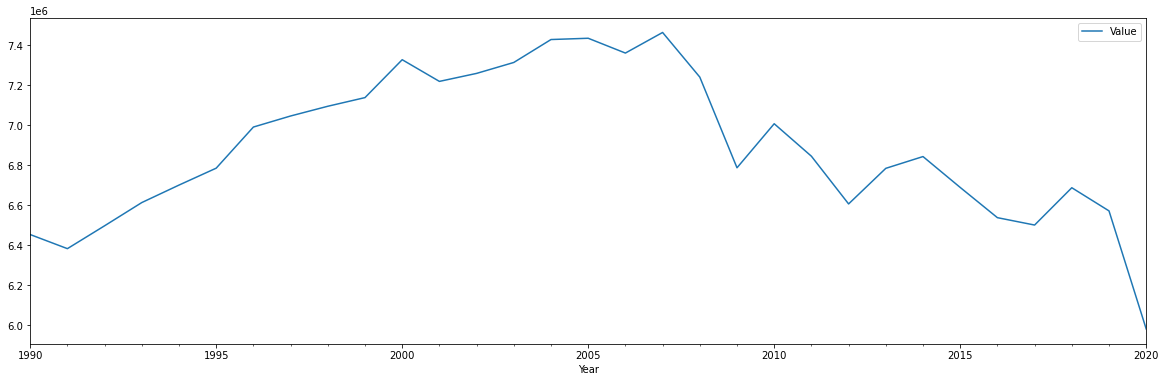

In [11]:
#Plot our US GHG data
us_ghg_df.plot(figsize = (20,6));

Let's go back to our full global dataset

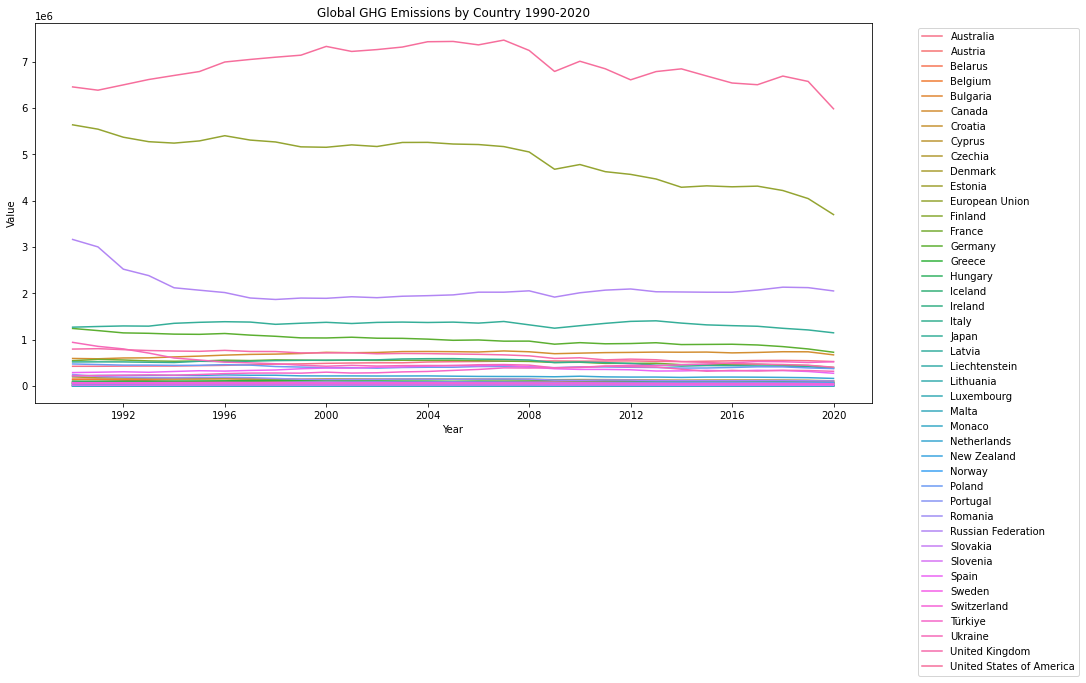

In [12]:
#Plot our data by country
fig, ax = plt.subplots(figsize= (15,7))

sns.lineplot(data=ghg_df, 
             x='Year', 
             y='Value', 
             hue='Country or Area', 
             legend='full')

# add title
plt.title('Global GHG Emissions by Country 1990-2020')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);


In [13]:
#Average GHG Emissions by country over last 30 years
avg_ghg_df = ghg_df.groupby('Country or Area').mean()
# Rename Value column to Average_Emissions
avg_ghg_df.rename(columns={'Value': 'Average_Emissions'}, inplace=True)
avg_ghg_df.head()

,Average_Emissions
Country or Area,
Australia,501486.714029
Austria,81691.123498
Belarus,94070.446372
Belgium,136800.125885
Bulgaria,64423.518535


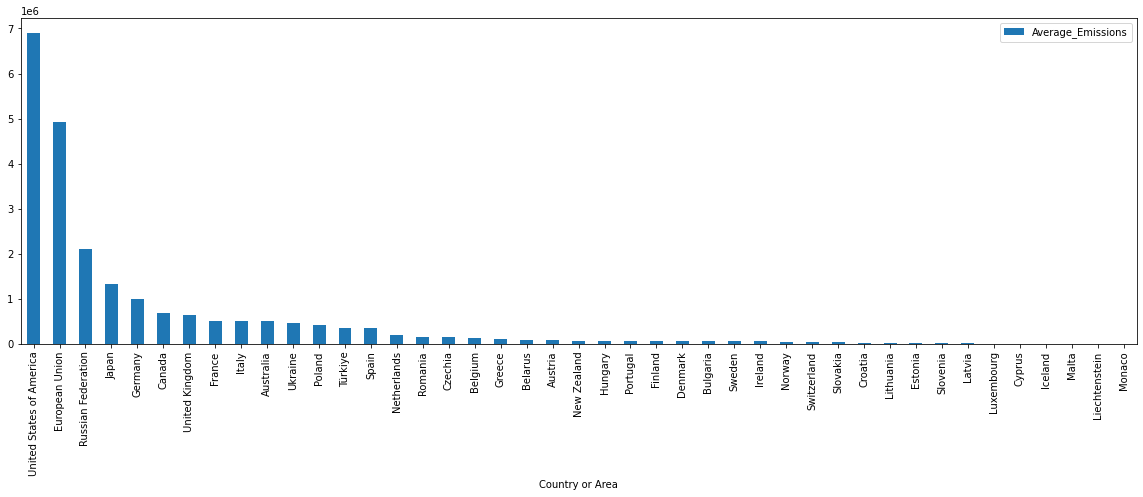

In [14]:
#Sort data by Avg Emissions
avg_ghg_df.sort_values('Average_Emissions', ascending=False, inplace=True)

#Plot a bar chart of Avg Emissions by country
avg_ghg_df.plot(kind='bar', figsize = (20,6));

In [18]:
#Top 10 Countries with Greatest Average Emisions
avg_ghg_df.head(10)

,Average_Emissions
Country or Area,
United States of America,6.890135e+06
European Union,4.918059e+06
Russian Federation,2.103195e+06
Japan,1.328931e+06
Germany,9.980514e+05
Canada,6.992633e+05
United Kingdom,6.479805e+05
France,5.199833e+05
Italy,5.123642e+05


In [35]:
ghg_df["Value"].where(ghg_df.loc[2020])

KeyError: 2020

In [19]:
# Emissions by Country Compared to 1990 Levels
ghg_df["Diff Compared to 1990 Levels"] = ghg_df.groupby("Country or Area")

,Country or Area,Value
Year,,
2020-01-01,Australia,5.281495e+05
2019-01-01,Australia,5.466066e+05
2018-01-01,Australia,5.524840e+05
2017-01-01,Australia,5.508749e+05
2016-01-01,Australia,5.439768e+05
...,...,...
1994-01-01,United States of America,6.700778e+06
1993-01-01,United States of America,6.613396e+06
1992-01-01,United States of America,6.497290e+06


## Conclusion

### Recommendations

### Next Steps